In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
import pandas as pd

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df.drop(columns=['isFraud'])  
y_train = train_df['isFraud']

X_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']


In [3]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Define the Sequential mlp
mlp = Sequential()

# Add the first hidden layer with 64 neurons and ReLU activation
mlp.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Add the second hidden layer with 32 neurons and ReLU activation
mlp.add(Dense(32, activation='relu'))

# Add the output layer with 1 neuron (for binary classification) and sigmoid activation
mlp.add(Dense(1, activation='sigmoid'))


c:\Users\Harman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
mlp.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [6]:
# Train the model
history = mlp.fit(X_train_scaled, y_train, epochs=5, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 242s 1ms/step - accuracy: 0.9810 - loss: 0.0504 - val_accuracy: 0.9877 - val_loss: 0.0324
Epoch 2/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 167s 1ms/step - accuracy: 0.9905 - loss: 0.0256 - val_accuracy: 0.9916 - val_loss: 0.0221
Epoch 3/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 261s 2ms/step - accuracy: 0.9919 - loss: 0.0220 - val_accuracy: 0.9905 - val_loss: 0.0260
Epoch 4/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 270s 2ms/step - accuracy: 0.9926 - loss: 0.0199 - val_accuracy: 0.9919 - val_loss: 0.0212
Epoch 5/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 239s 2ms/step - accuracy: 0.9933 - loss: 0.0184 - val_accuracy: 0.9873 - val_loss: 0.0339


In [7]:
y_pred = mlp.predict(X_test_scaled)

# Since the output is sigmoid, we'll threshold at 0.99 for binary classification
y_pred = (y_pred >0.99).astype(int)

print(f"Predictions: {y_pred[:10]}")  

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 39s 976us/step
Predictions: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [8]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_mlp = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_mlp*100:.2f}%\n")

Accuracy: 99.92%



In [9]:
classification_mlp = classification_report(y_test,y_pred)
print(f"Classification Report: {classification_mlp}")

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.62      0.87      0.73      1643

    accuracy                           1.00   1272524
   macro avg       0.81      0.94      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



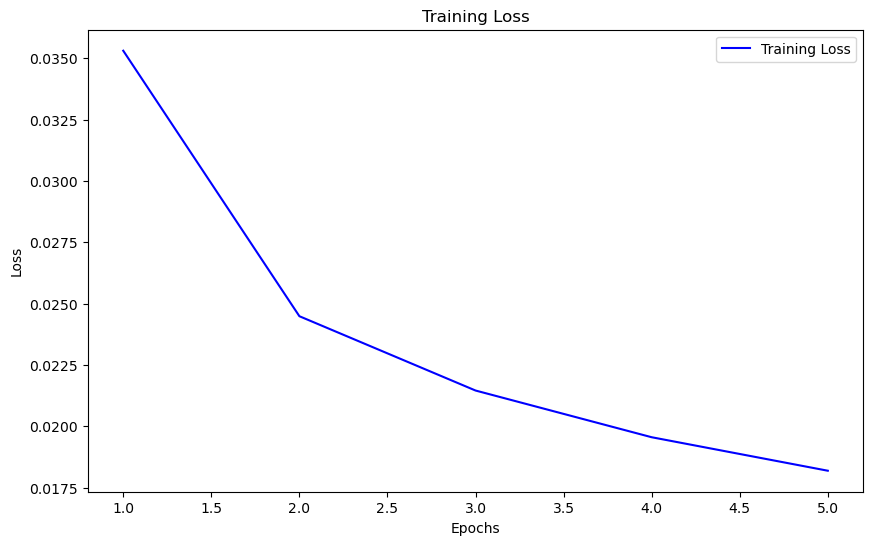

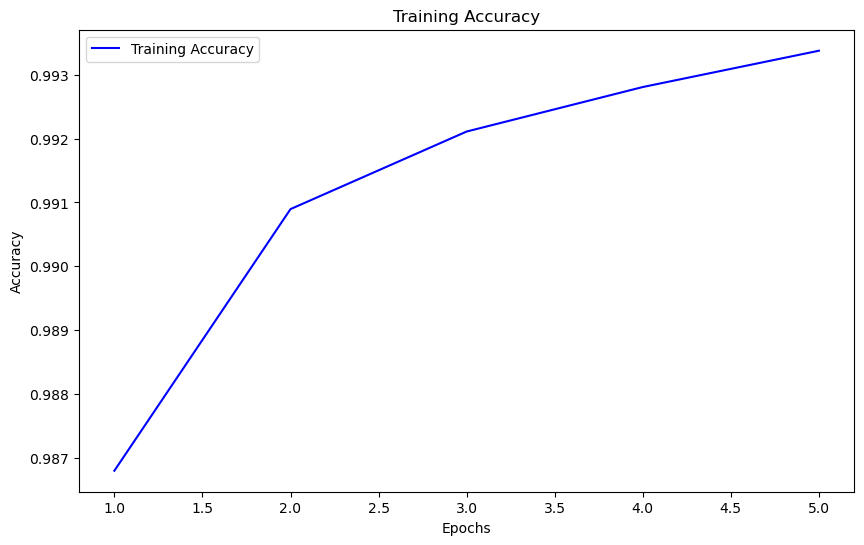

In [11]:
import matplotlib.pyplot as plt

# Access training metrics
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
